# Classifiers for the Titanic data set from Kaggle

## 1. Decision Tree based on numerical features

We implemented a basic decision tree class in a separate Python file, which we import first together with a few other packages.

In [1]:
from decision_tree_code import DecisionTree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext watermark

In [3]:
%watermark -v -a 'Pieter_Spaas' -p numpy,pandas,matplotlib

Author: Pieter_Spaas

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.1.0

numpy     : 2.3.3
pandas    : 2.3.2
matplotlib: 3.10.6



In [4]:
train = pd.read_csv('data/train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will only consider numerical features for this first decision tree classifier. Because of this, we will drop the columns 'Name', 'Ticket', and 'Cabin'. We will also drop 'PassengerId' as it is irrelevant. Additionally, we will convert the features 'Pclass' (with 3 values), 'Sex' (with two values), and 'Embarked' (with three values, ignoring NaN) to binary using one hot encoding.

In [5]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# train.head()

In [6]:
train = pd.get_dummies(train, prefix=['Pclass', 'Sex', 'Embarked'], columns=['Pclass', 'Sex', 'Embarked'], dtype=int)

train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


Before continuing, we will try and visualize the data with some histograms, as well as some scatterplots comparing two features each for some of the features.

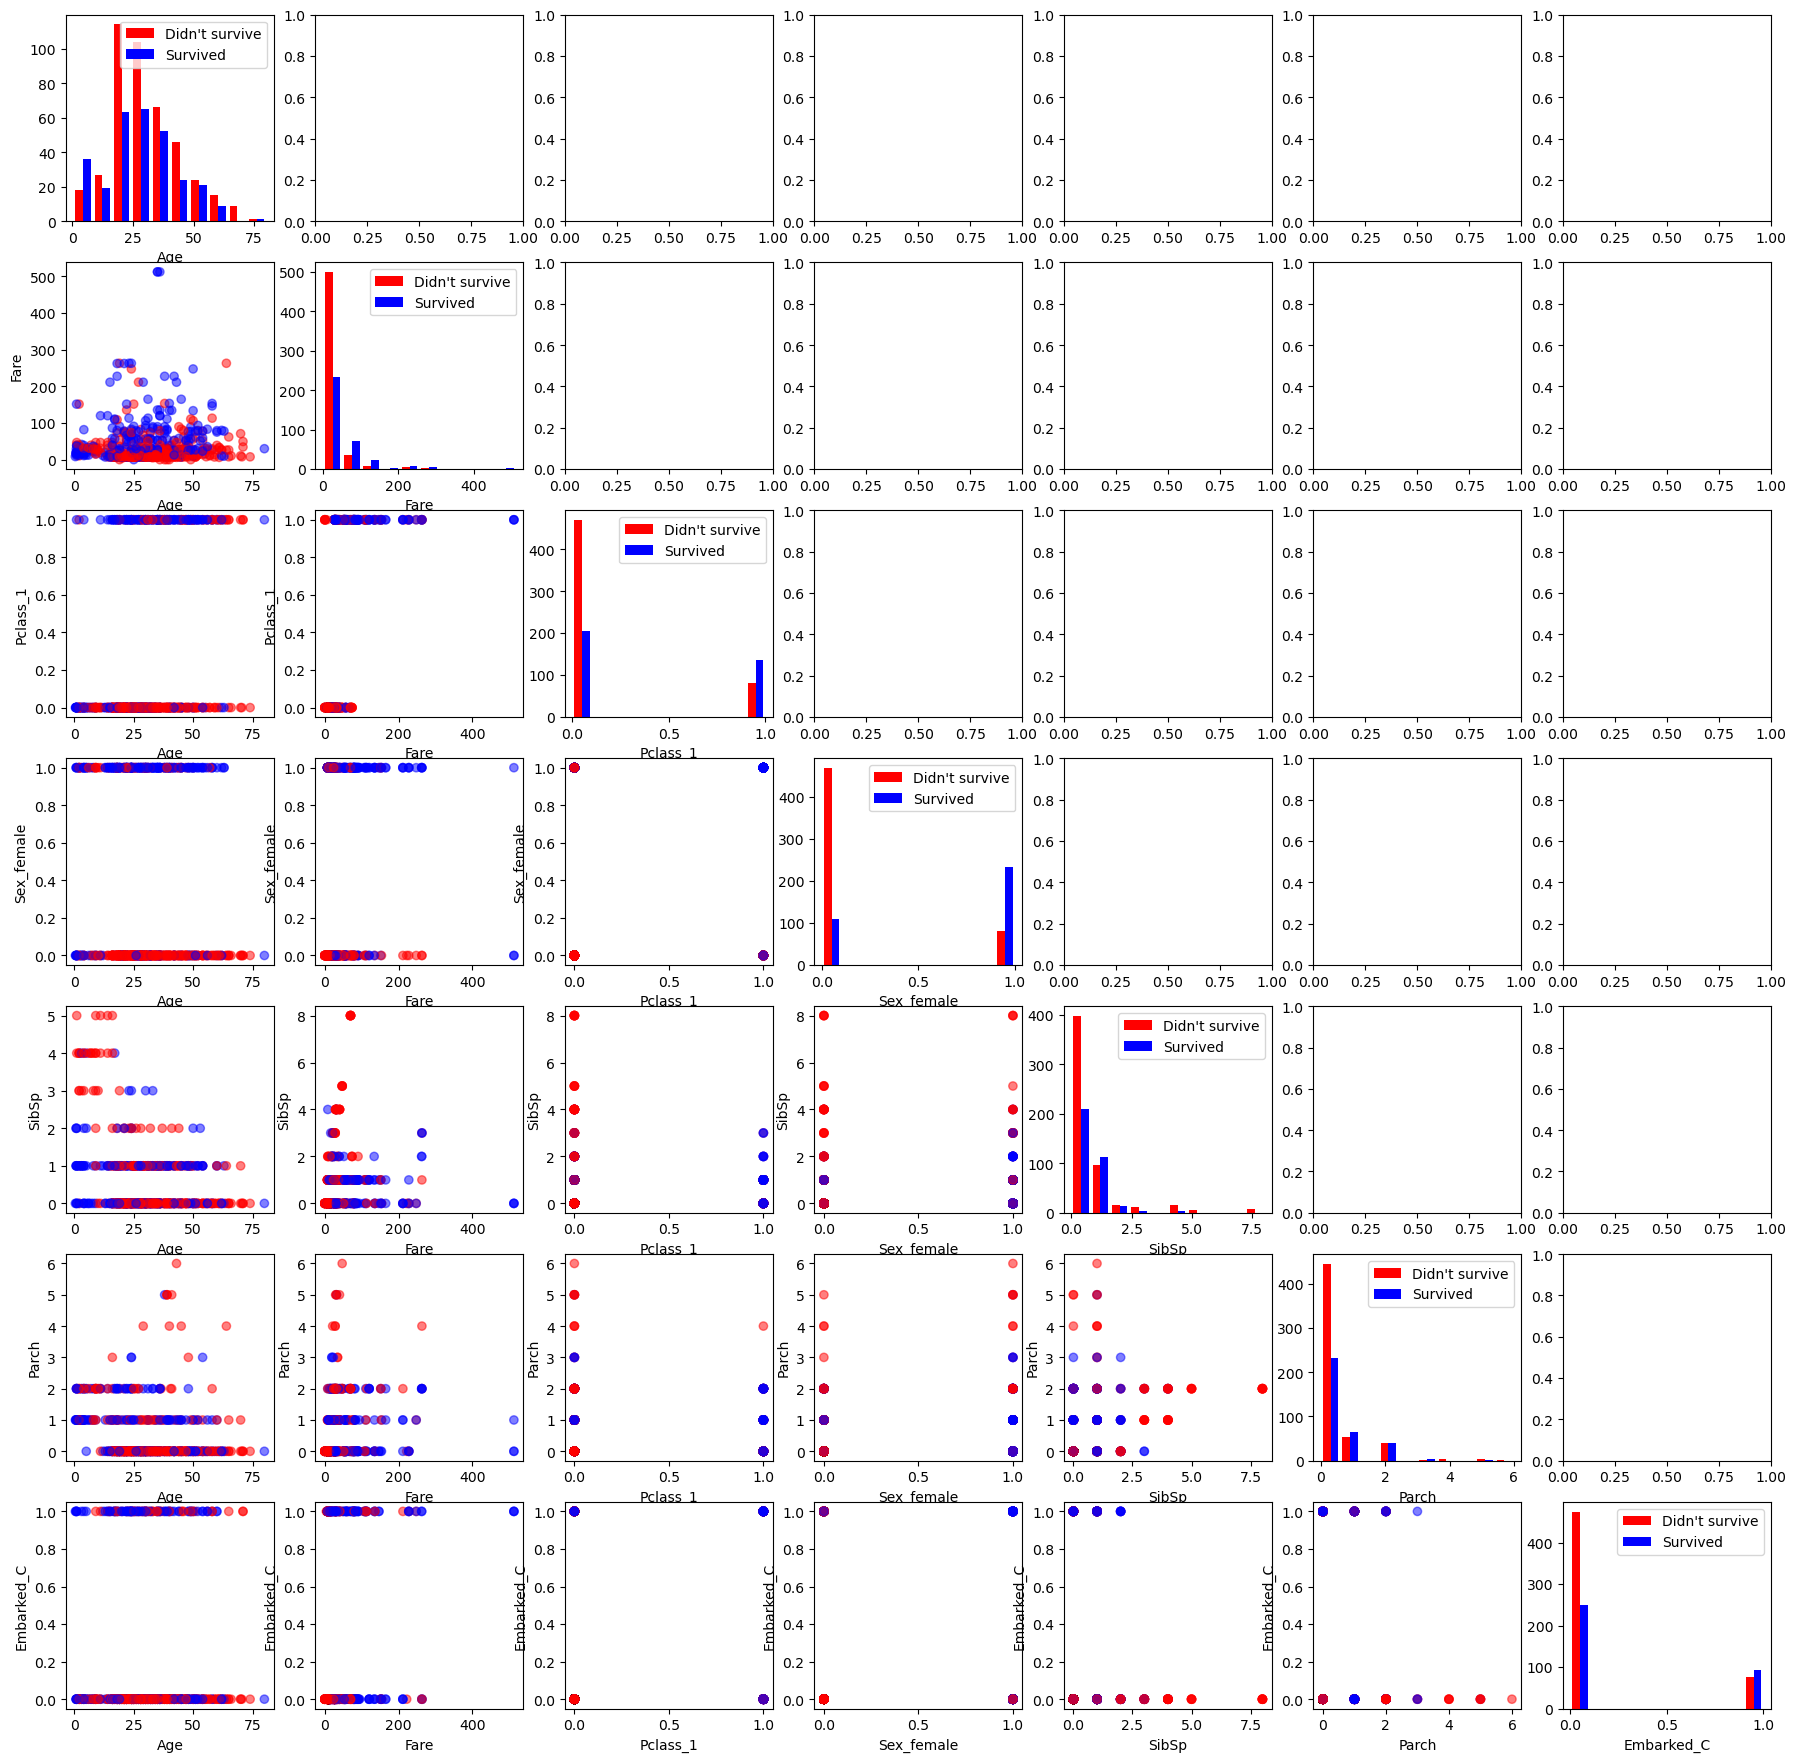

In [7]:
color_map = {0: 'r', 1: 'b'}
features = ['Age', 'Fare', 'Pclass_1', 'Sex_female', 'SibSp', 'Parch', 'Embarked_C']

fig, ax = plt.subplots(nrows=7, ncols=7, figsize=(22, 22))

i = 0
for feat1 in features:
    j = 0
    for feat2 in features:
        if i < j:
            continue
        if feat1 == feat2:
            ax[i,j].hist([train[train['Survived'] == 0][feat1], train[train['Survived'] == 1][feat1]], color=['r', 'b'], label=['Didn\'t survive', 'Survived'])
            ax[i,j].set_xlabel(feat1)
            ax[i,j].legend()
        else:
            ax[i,j].scatter(train[feat2], train[feat1], c=train['Survived'].map(color_map), marker='o', alpha=0.5)
            ax[i,j].set_xlabel(feat2)
            ax[i,j].set_ylabel(feat1)
        j += 1
    i += 1

plt.show()

Finally, we separate the target column 'Survived' from our training set and fit a decision tree.

In [8]:
y_train = train['Survived']
train.drop(['Survived'], axis=1, inplace=True)

In [9]:
tree2 = DecisionTree(max_depth=2)
tree2.fit(train, y_train)

Having our decision tree ready, we will now import the test data, format it similarly to the training data, and make our predictions.

In [10]:
test = pd.read_csv('data/test.csv')
# test.head()

In [11]:
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test = pd.get_dummies(test, prefix=['Pclass', 'Sex', 'Embarked'], columns=['Pclass', 'Sex', 'Embarked'], dtype=int)

# test.head()

In [12]:
test['Survived'] = None

for i in range(test.shape[0]):
    test.loc[i, 'Survived'] = tree2.predict(test.iloc[i])

# test.head()

In [13]:
predictions2 = test[['PassengerId', 'Survived']]

# predictions2.tail()

In [14]:
# predictions2.to_csv('predictions2.csv', index=False)

We now try a few different tree depths:

In [15]:
tree3 = DecisionTree(max_depth=3)
tree3.fit(train, y_train)

In [16]:
test['Survived'] = None

for i in range(test.shape[0]):
    test.loc[i, 'Survived'] = tree3.predict(test.iloc[i])

# test.head()

In [17]:
predictions3 = test[['PassengerId', 'Survived']]

# predictions3.tail()

In [18]:
# predictions3.to_csv('predictions3.csv', index=False)

In [19]:
tree4 = DecisionTree(max_depth=4)
tree4.fit(train, y_train)

In [20]:
test['Survived'] = None

for i in range(test.shape[0]):
    test.loc[i, 'Survived'] = tree4.predict(test.iloc[i])

# test.head()

In [21]:
predictions4 = test[['PassengerId', 'Survived']]

# predictions4.tail()

In [22]:
predictions4.to_csv('predictions4.csv', index=False)

In [23]:
tree1 = DecisionTree(max_depth=1)
tree1.fit(train, y_train)

In [24]:
test['Survived'] = None

for i in range(test.shape[0]):
    test.loc[i, 'Survived'] = tree1.predict(test.iloc[i])

# test.head()

In [25]:
predictions1 = test[['PassengerId', 'Survived']]

# predictions1.tail()

In [26]:
# predictions1.to_csv('predictions1.csv', index=False)

### Results:

Tree of depth 2: Accuracy 0.77033

Tree of depth 3: Accuracy 0.76315

Tree of depth 4: Accuracy 0.75119

Tree of depth 1: Accuracy 0.76555